## Random walk example, comparing TD(0) and constant-$\alpha$ MC

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
np.random.seed(2025)

In [3]:
states = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}  # states, LT: left termination, RT: right termination
loc2state = {v:k for k, v in states.items()}
# defining the transition probability - equal probability to move left or right 
transition_prob = {'L': 1/2,
                   'R': 1/2}

In [4]:
def state_transition(s, a):
    # current state s, take action a, return s' and reward r    
    if s == 'A' and a == 'L':
        print('transitioning to left terminal')
        s_prime = 'LT'
        r = 0 
    elif s == 'E' and a == 'R':
        print('transitioning to right terminal')
        s_prime = 'RT'
        r = 1 
    else:
        if a == 'L':
            s_prime = loc2state[states[s]-1]
            r = 0 
        else:
            s_prime = loc2state[states[s]+1]
            r = 0

    return s_prime, r 

In [5]:
s_prime, a = state_transition('E', 'R')
s_prime, a 

transitioning to right terminal


('RT', 1)

In [6]:
n_episodes = 100

In [7]:
# constant-alpha MC
values = {k:0 for k in states.keys()}

alpha = 0.1

for epI in np.arange(n_episodes):
    print(f'episode {epI}')
    G = 0 
    # every episode always starts from C 
    s = 'C'
    episode = [] 
    
    # simmulating an episode 
    while s not in ['RT', 'LT']:
        randnum = np.random.uniform(low=0, high=1)
        if randnum < transition_prob['L']:
            a = 'L'
        else:
            a = 'R'   

        s_prime, r = state_transition(s, a)
        
        episode.extend([s, a, r])

        s = s_prime

    print(episode)

    while len(episode) > 0:
        r = episode.pop()
        a = episode.pop() 
        s = episode.pop()

        G += r 

        if s in episode:
            continue
        else:            
            values[s] = values[s] + alpha * (G - values[s])    

        # values[s] = values[s] + alpha * (G - values[s])

    print(values)

episode 0
transitioning to left terminal
['C', 'L', 0, 'B', 'R', 0, 'C', 'R', 0, 'D', 'L', 0, 'C', 'L', 0, 'B', 'L', 0, 'A', 'R', 0, 'B', 'L', 0, 'A', 'R', 0, 'B', 'R', 0, 'C', 'L', 0, 'B', 'R', 0, 'C', 'L', 0, 'B', 'R', 0, 'C', 'L', 0, 'B', 'L', 0, 'A', 'R', 0, 'B', 'R', 0, 'C', 'L', 0, 'B', 'L', 0, 'A', 'R', 0, 'B', 'R', 0, 'C', 'L', 0, 'B', 'L', 0, 'A', 'R', 0, 'B', 'R', 0, 'C', 'L', 0, 'B', 'R', 0, 'C', 'L', 0, 'B', 'L', 0, 'A', 'L', 0]
{'A': 0.0, 'B': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0}
episode 1
transitioning to right terminal
['C', 'R', 0, 'D', 'R', 0, 'E', 'R', 1]
{'A': 0.0, 'B': 0.0, 'C': 0.1, 'D': 0.1, 'E': 0.1}
episode 2
transitioning to left terminal
['C', 'L', 0, 'B', 'L', 0, 'A', 'L', 0]
{'A': 0.0, 'B': 0.0, 'C': 0.09, 'D': 0.1, 'E': 0.1}
episode 3
transitioning to right terminal
['C', 'R', 0, 'D', 'R', 0, 'E', 'L', 0, 'D', 'R', 0, 'E', 'L', 0, 'D', 'R', 0, 'E', 'R', 1]
{'A': 0.0, 'B': 0.0, 'C': 0.181, 'D': 0.19, 'E': 0.19}
episode 4
transitioning to left terminal
['C', 'L',

In [8]:
# TD(0)
values = {k:0 for k in states.keys()}
values['RT'] = 0 
values['LT'] = 0 

values_dict = {0: list(values.values())}
record = [1, 10, 100]

for epI in np.arange(n_episodes):
    print(f'episode {epI}')

    # every episode always starts from C 
    s = 'C'
    episode = [] 

    # simmulating an episode 
    while s not in ['RT', 'LT']:
        randnum = np.random.uniform(low=0, high=1)
        if randnum < transition_prob['L']:
            a = 'L'
        else:
            a = 'R'   

        s_prime, r = state_transition(s, a)

        values[s] = values[s] + alpha * (r + values[s_prime] - values[s]) 
        
        episode.extend([s, a, r])

        s = s_prime

    print(episode)
    print(values) 

    if epI + 1 in record:
        values_dict[epI + 1] = list(values.values())

episode 0
transitioning to right terminal
['C', 'R', 0, 'D', 'R', 0, 'E', 'R', 1]
{'A': 0, 'B': 0, 'C': 0.0, 'D': 0.0, 'E': 0.1, 'RT': 0, 'LT': 0}
episode 1
transitioning to right terminal
['C', 'R', 0, 'D', 'R', 0, 'E', 'L', 0, 'D', 'L', 0, 'C', 'R', 0, 'D', 'R', 0, 'E', 'L', 0, 'D', 'L', 0, 'C', 'L', 0, 'B', 'R', 0, 'C', 'L', 0, 'B', 'R', 0, 'C', 'R', 0, 'D', 'R', 0, 'E', 'R', 1]
{'A': 0, 'B': 0.00014661000000000003, 'C': 0.0022203900000000005, 'D': 0.022375000000000006, 'E': 0.17525800000000002, 'RT': 0, 'LT': 0}
episode 2
transitioning to left terminal
['C', 'R', 0, 'D', 'L', 0, 'C', 'L', 0, 'B', 'L', 0, 'A', 'R', 0, 'B', 'R', 0, 'C', 'L', 0, 'B', 'R', 0, 'C', 'R', 0, 'D', 'L', 0, 'C', 'R', 0, 'D', 'L', 0, 'C', 'R', 0, 'D', 'L', 0, 'C', 'L', 0, 'B', 'R', 0, 'C', 'R', 0, 'D', 'L', 0, 'C', 'L', 0, 'B', 'L', 0, 'A', 'R', 0, 'B', 'L', 0, 'A', 'R', 0, 'B', 'R', 0, 'C', 'L', 0, 'B', 'L', 0, 'A', 'L', 0]
{'A': 0.00021841465741675949, 'B': 0.0016294221729822543, 'C': 0.0067773948475895835,

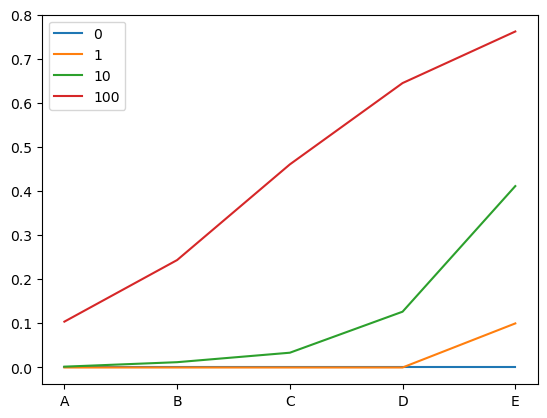

In [9]:
for k, v in values_dict.items():
    plt.plot(np.arange(len(states)), list(v)[:-2])

plt.xticks(np.arange(len(states)), labels=list(states.keys()))
plt.legend(list(values_dict.keys()))
plt.show() 